In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_datas=pd.read_csv("/content/train_ctrUa4K (1).csv")
train_datas

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_datas.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_datas.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

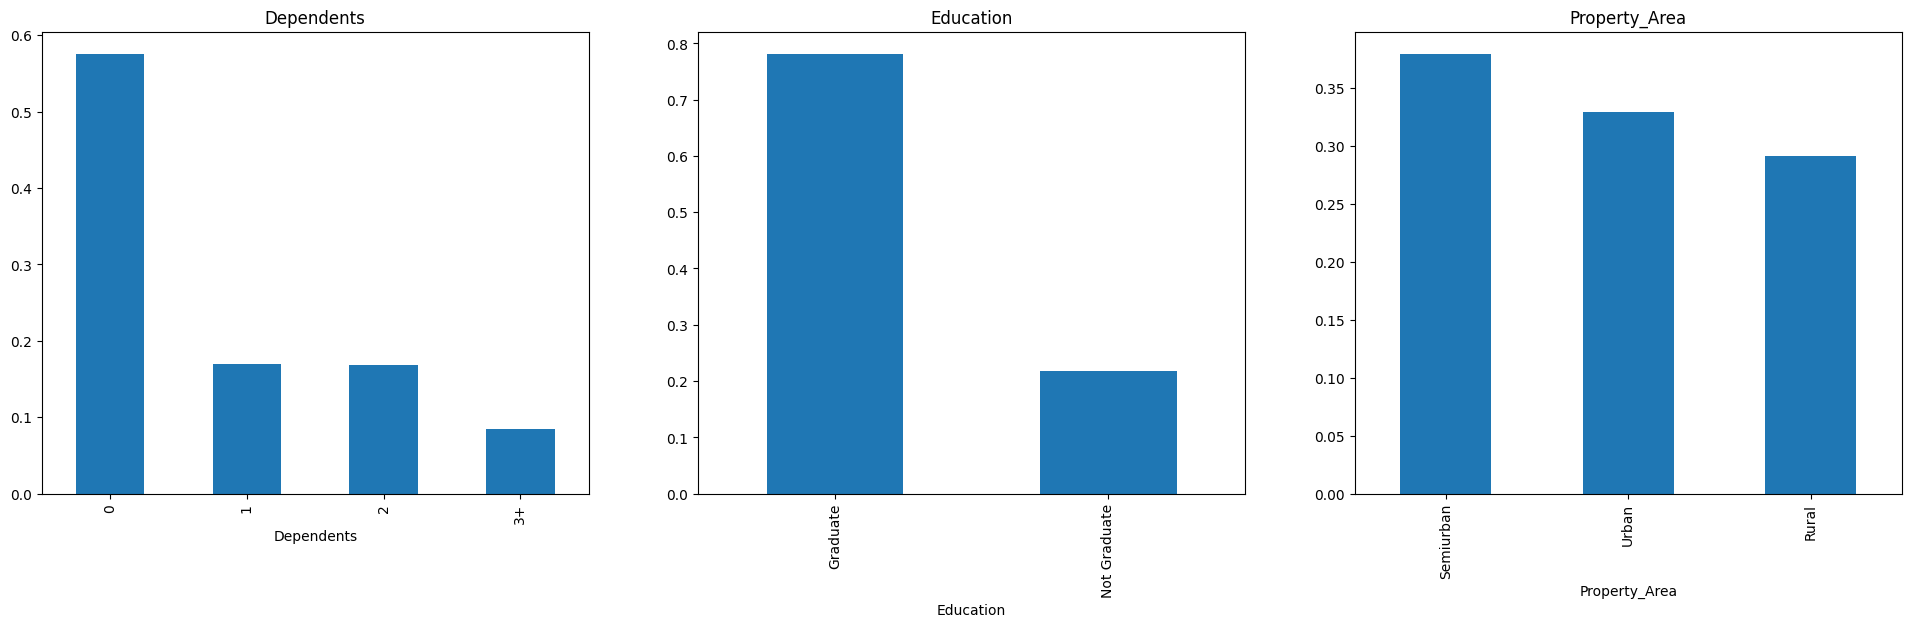

In [ ]:
plt.figure(1)
plt.subplot(131)
train_datas['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train_datas['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train_datas['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()


Most of the applicants don’t have dependents,About 80% of the applicants are graduates and most of the applicants are from semi-urban areas

<ipython-input-1243-01e0fee1f819>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_datas['ApplicantIncome'])


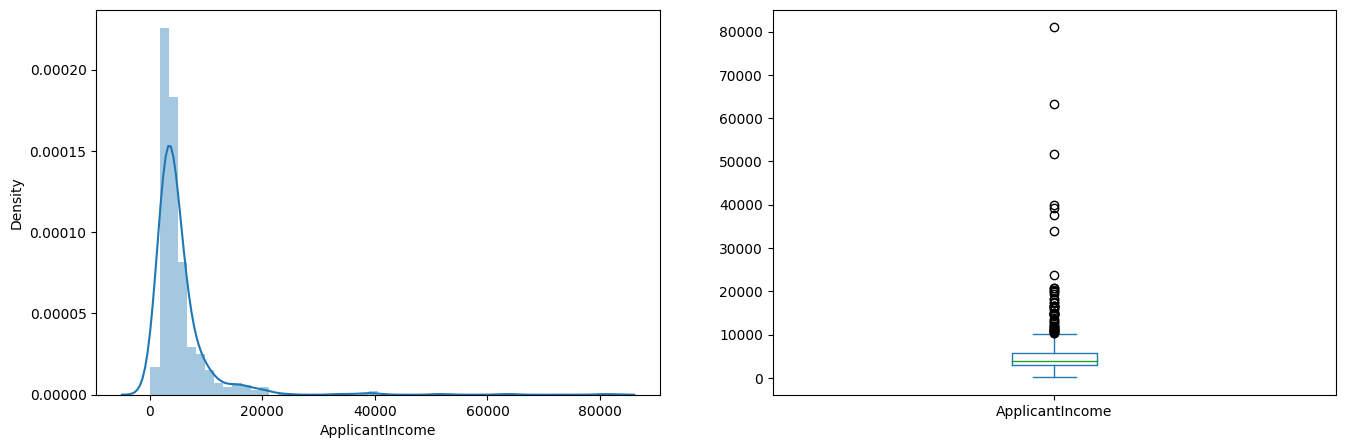

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_datas['ApplicantIncome'])
plt.subplot(122)
train_datas['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

<ipython-input-1244-04897e196013>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount']);


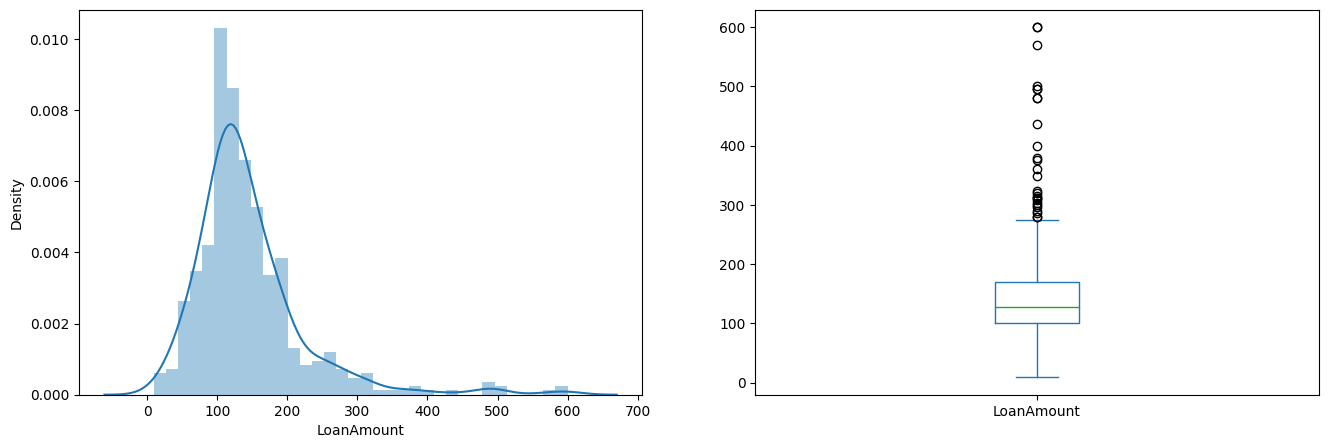

In [ ]:
plt.figure(1)
plt.subplot(121)
df=train_datas.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

There is outlayers

In [ ]:
#Treating null Values
train_datas['Dependents'] = train_datas['Dependents'].fillna(0)
train_datas['LoanAmount'] = train_datas['LoanAmount'].fillna(train_datas['LoanAmount'].mean())
train_datas['Credit_History'] = train_datas['Credit_History'].fillna(train_datas['Credit_History'].mean())
train_datas['Gender'] = train_datas['Gender'].fillna(train_datas['Gender'].mode()[0])
train_datas['Married'] = train_datas['Married'].fillna(train_datas['Married'].mode()[0])
train_datas['Self_Employed'] = train_datas['Self_Employed'].fillna(train_datas['Self_Employed'].mode()[0])
train_datas.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_datas['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

The value of 360 is repeated the most. So we will replace the missing values in this variable using the mode of this variable

In [ ]:
train_datas['Loan_Amount_Term']= train_datas['Loan_Amount_Term'].fillna(train_datas['Loan_Amount_Term'].median())

In [ ]:
train_datas.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
train_datas['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

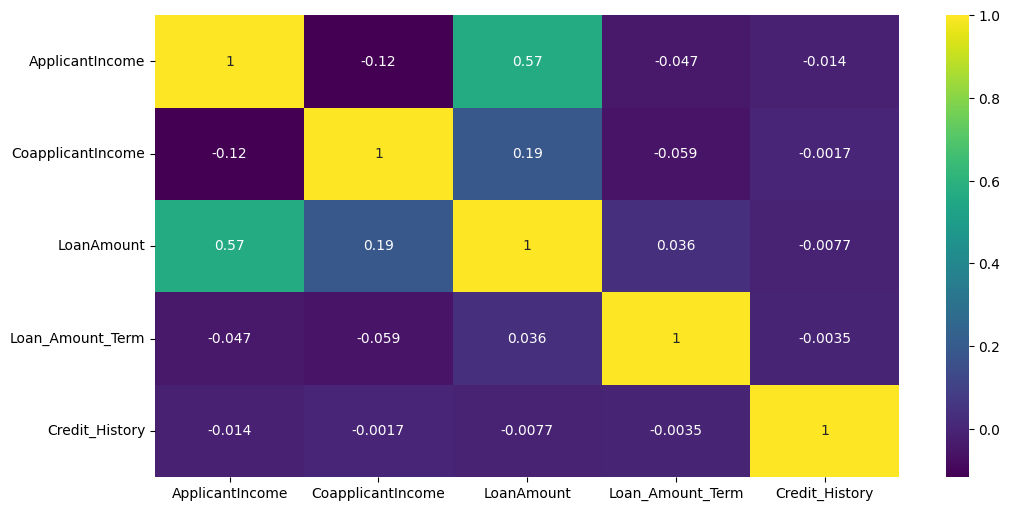

In [ ]:
numeric_train = train_datas.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_train.corr(), cmap='viridis', annot=True)
plt.show()

In [ ]:
#Loading test data and treating nullvalues
test_datas=pd.read_csv("/content/test_lAUu6dG (1).csv")

In [ ]:
test_datas['Gender'].fillna(test_datas['Gender'].mode()[0], inplace=True)
test_datas['Dependents'].fillna(test_datas['Dependents'].mode()[0], inplace=True)
test_datas['Self_Employed'].fillna(test_datas['Self_Employed'].mode()[0], inplace=True)
test_datas['Credit_History'].fillna(test_datas['Credit_History'].mode()[0], inplace=True)
test_datas['Loan_Amount_Term'].fillna(test_datas['Loan_Amount_Term'].mode()[0], inplace=True)
test_datas['LoanAmount'].fillna(test_datas['LoanAmount'].median(), inplace=True)

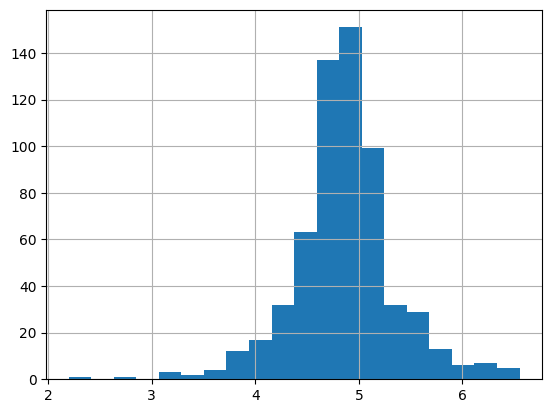

In [ ]:
train_datas['LoanAmount_log'] = np.log(train_datas['LoanAmount'])
train_datas['LoanAmount_log'].hist(bins=20)
test_datas['LoanAmount_log'] = np.log(test_datas['LoanAmount'])

In [ ]:
train_datas=train_datas.drop('Loan_ID',axis=1)
test_datas=test_datas.drop('Loan_ID',axis=1)

Splitting

In [ ]:
X = train_datas.drop('Loan_Status', axis=1)
y = train_datas.Loan_Status

Changing the value of gender into 0 and 1

In [ ]:
X=pd.get_dummies(X)
train_datas=pd.get_dummies(train_datas,dtype=int)
test_datas=pd.get_dummies(test_datas,dtype=int)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_cv = model.predict(x_cv)

In [ ]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [ ]:
test_datas

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,4.727388,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,4.744932,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,4.836282,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,5.062595,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
train_datas

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,4.986426,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,4.787492,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,4.262680,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,3.688879,0,1,0,1,...,1,1,0,1,0,1,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
612,7583,0.0,187.000000,360.0,1.0,5.231109,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [ ]:
test_datas.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
train_datas.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [ ]:
if not set(test_datas.columns) == set(model.feature_names_in_):
    # If there are differences in the feature names
    raise ValueError("Feature names in test_datas do not match those used during training.")

# Reorder the columns of the testing dataset to match the order during training
test_reordered = test_datas[model.feature_names_in_]

# Make predictions using the reordered testing dataset
pred_test = model.predict(test_reordered)

In [ ]:
submission=pd.read_csv("/content/sample_submission_49d68Cx (1).csv")

In [ ]:
submission['Loan_Status']=pred_test

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')